<a href="https://colab.research.google.com/github/Hubertmeteor/Industrial-Copper-Modeling/blob/main/copper_modelling_predict_status.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from datetime import date
import numpy as np
import pickle
import streamlit as st
import joblib
from joblib import load




# Streamlit page custom design

def streamlit_config():

    # page configuration
    st.set_page_config(page_title='Industrial Copper Modeling')

    # page header transparent color
    page_background_color = """
    <style>

    [data-testid="stHeader"]
    {
    background: rgba(0,0,0,0);
    }

    </style>
    """
    st.markdown(page_background_color, unsafe_allow_html=True)

    # title and position
    st.markdown(f'<h1 style="text-align: center;">Industrial Copper Modeling</h1>',
                unsafe_allow_html=True)



# custom style for submit button - color and width

def style_submit_button():

    st.markdown("""
                    <style>
                    div.stButton > button:first-child {
                                                        background-color: #367F89;
                                                        color: white;
                                                        width: 70%}
                    </style>
                """, unsafe_allow_html=True)



# custom style for prediction result text - color and position

def style_prediction():

    st.markdown(
            """
            <style>
            .center-text {
                text-align: center;
                color: #20CA0C
            }
            </style>
            """,
            unsafe_allow_html=True
        )



# user input options

class options:
    country_values = [25.0, 26.0, 27.0, 28.0, 30.0, 32.0, 38.0, 39.0, 40.0, 77.0,
                    78.0, 79.0, 80.0, 84.0, 89.0, 107.0, 113.0]

    status_values = ['Won', 'Lost', 'Draft', 'To be approved', 'Not lost for AM',
                    'Wonderful', 'Revised', 'Offered', 'Offerable']
    status_dict = {'Lost': 0, 'Won': 1, 'Draft': 2, 'To be approved': 3, 'Not lost for AM': 4,
                   'Wonderful': 5, 'Revised': 6, 'Offered': 7, 'Offerable': 8}

    item_type_values = ['W', 'WI', 'S', 'PL', 'IPL', 'SLAWR', 'Others']
    item_type_dict = {'W': 5.0, 'WI': 6.0, 'S': 3.0, 'Others': 1.0, 'PL': 2.0, 'IPL': 0.0, 'SLAWR': 4.0}

    application_values = [2.0, 3.0, 4.0, 5.0, 10.0, 15.0, 19.0, 20.0, 22.0, 25.0, 26.0,
                        27.0, 28.0, 29.0, 38.0, 39.0, 40.0, 41.0, 42.0, 56.0, 58.0,
                        59.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 79.0, 99.0]

    product_ref_values = [611728, 611733, 611993, 628112, 628117, 628377, 640400,
                        640405, 640665, 164141591, 164336407, 164337175, 929423819,
                        1282007633, 1332077137, 1665572032, 1665572374, 1665584320,
                        1665584642, 1665584662, 1668701376, 1668701698, 1668701718,
                        1668701725, 1670798778, 1671863738, 1671876026, 1690738206,
                        1690738219, 1693867550, 1693867563, 1721130331, 1722207579]




# Get input data from users both regression and classification methods

class prediction:

    def regression():

        # get input from users
        with st.form('Regression'):

            col1,col2,col3 = st.columns([0.5,0.1,0.5])

            with col1:

                item_date = st.date_input(label='Item Date', min_value=date(2020,7,1),
                                        max_value=date(2021,5,31), value=date(2020,7,1))

                quantity_log = st.text_input(label='Quantity Tons (Min: 0.00001 & Max: 1000000000)')

                country = st.selectbox(label='Country', options=options.country_values)

                item_type = st.selectbox(label='Item Type', options=options.item_type_values)

                thickness_log = st.number_input(label='Thickness', min_value=0.1, max_value=2500000.0, value=1.0)

                product_ref = st.selectbox(label='Product Ref', options=options.product_ref_values)


            with col3:

                delivery_date = st.date_input(label='Delivery Date', min_value=date(2020,8,1),
                                            max_value=date(2022,2,28), value=date(2020,8,1))

                customer = st.text_input(label='Customer ID (Min: 12458000 & Max: 2147484000)')

                status = st.selectbox(label='Status', options=options.status_values)

                application = st.selectbox(label='Application', options=options.application_values)

                width = st.number_input(label='Width', min_value=1.0, max_value=2990000.0, value=1.0)

                st.write('')
                st.write('')
                button = st.form_submit_button(label='SUBMIT')
                style_submit_button()


        # give information to users
        col1,col2 = st.columns([0.65,0.35])
        with col2:
            st.caption(body='*Min and Max values are reference only')


        # user entered the all input values and click the button
        if button:

            # load the regression pickle model
            with open(r'models\regression_model.pkl', 'rb') as f:
                model = pickle.load(f)

            # make array for all user input values in required order for model prediction
            user_data = np.array([[customer,
                                country,
                                options.status_dict[status],
                                options.item_type_dict[item_type],
                                application,
                                width,
                                product_ref,
                                np.log(float(quantity_log))if quantity_log else 0,
                                np.log(float(thickness_log))if thickness_log else 0,
                                item_date.day if item_date else 0,
                                item_date.month if item_date else 0,
                                item_date.year if item_date else 0,
                                delivery_date.day if delivery_date else 0,
                                delivery_date.month if delivery_date else 0,
                                delivery_date.year if delivery_date else 0]])

            # model predict the selling price based on user input
            y_pred = model.predict(user_data)

            # inverse transformation for log transformation data
            selling_price = np.exp(y_pred[0])

            # round the value with 2 decimal point (Eg: 1.35678 to 1.36)
            selling_price = round(selling_price, 2)

            return selling_price


    def classification():

        # get input from users
        with st.form('Classification'):

            col1,col2,col3 = st.columns([0.5,0.1,0.5])

            with col1:

                item_date = st.date_input(label='Item Date', min_value=date(2020,7,1),
                                        max_value=date(2021,5,31), value=date(2020,7,1))

                quantity_log = st.text_input(label='Quantity Tons (Min: 0.00001 & Max: 1000000000)')

                country = st.selectbox(label='Country', options=options.country_values)

                item_type = st.selectbox(label='Item Type', options=options.item_type_values)

                thickness_log = st.number_input(label='Thickness', min_value=0.1, max_value=2500000.0, value=1.0)

                product_ref = st.selectbox(label='Product Ref', options=options.product_ref_values)


            with col3:

                delivery_date = st.date_input(label='Delivery Date', min_value=date(2020,8,1),
                                            max_value=date(2022,2,28), value=date(2020,8,1))

                customer = st.text_input(label='Customer ID (Min: 12458000 & Max: 2147484000)')

                selling_price_log = st.text_input(label='Selling Price (Min: 0.1 & Max: 100001000)')

                application = st.selectbox(label='Application', options=options.application_values)

                width = st.number_input(label='Width', min_value=1.0, max_value=2990000.0, value=1.0)

                st.write('')
                st.write('')
                button = st.form_submit_button(label='SUBMIT')
                style_submit_button()


        # give information to users
        col1,col2 = st.columns([0.65,0.35])
        with col2:
            st.caption(body='*Min and Max values are reference only')


        # user entered the all input values and click the button
        if button:

            # load the classification pickle model
            with open(r'models\classification_model.pkl', 'rb') as f:
                model = pickle.load(f)

            # make array for all user input values in required order for model prediction
            user_data = np.array([[customer,
                                country,
                                options.item_type_dict[item_type],
                                application,
                                width,
                                product_ref,
                                np.log(float(quantity_log))if quantity_log else 0,
                                np.log(float(thickness_log))if thickness_log else 0,
                                item_date.day if item_date else 0,
                                item_date.month if item_date else 0,
                                np.log(float(selling_price_log)),
                                item_date.year if item_date else 0,
                                delivery_date.day if delivery_date else 0,
                                delivery_date.month if delivery_date else 0,
                                delivery_date.year if delivery_date else 0]])

            # model predict the status based on user input
            y_pred = model.predict(user_data)

            # we get the single output in list, so we access the output using index method
            status = y_pred[0]

            return status



streamlit_config()

tab1, tab2 = st.tabs(['PREDICT SELLING PRICE', 'PREDICT STATUS'])

with tab1:

    try:

        selling_price = prediction.regression()

        if selling_price:
            # apply custom css style for prediction text
            style_prediction()
            st.markdown(f'### <div class="center-text">Predicted Selling Price = {selling_price}</div>', unsafe_allow_html=True)
            st.balloons()


    except ValueError:

        col1,col2,col3 = st.columns([0.26,0.55,0.26])

        with col2:
            st.warning('##### Quantity Tons / Customer ID is empty')



with tab2:

    try:

        status = prediction.classification()

        if status == 1:

            # apply custom css style for prediction text
            style_prediction()
            st.markdown(f'### <div class="center-text">Predicted Status = Won</div>', unsafe_allow_html=True)
            st.balloons()


        elif status == 0:

            # apply custom css style for prediction text
            style_prediction()
            st.markdown(f'### <div class="center-text">Predicted Status = Lost</div>', unsafe_allow_html=True)
            st.snow()


    except ValueError:

        col1,col2,col3 = st.columns([0.15,0.70,0.15])

        with col2:
            st.warning('##### Quantity Tons / Customer ID / Selling Price is empty')


In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import statistics

# Example dataset
data = [1, 2, 2, 3, 4, 4, 4, 5]

# Calculate median using numpy
median = np.median(data)
print("Median:", median)

# Calculate mode using scipy.stats
mode = stats.mode(data)
print("Mode:", mode)

# Calculate mode using statistics
mode = statistics.mode(data)
print("Mode (statistics module):", mode)


Median: 3.5
Mode: ModeResult(mode=4, count=3)
Mode (statistics module): 4


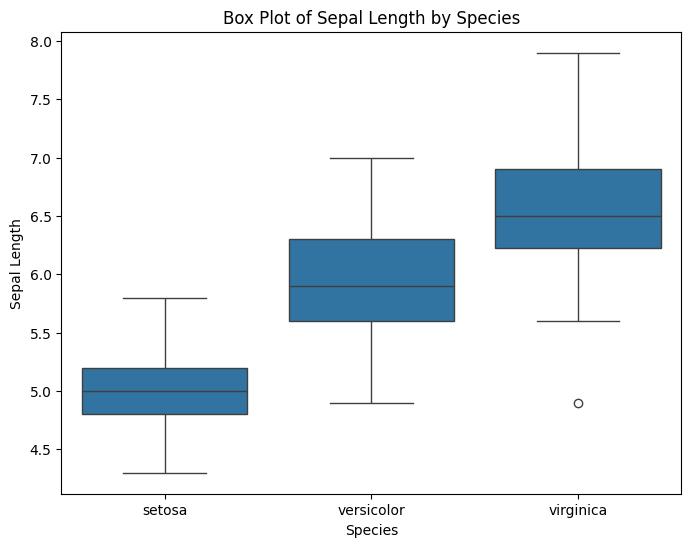

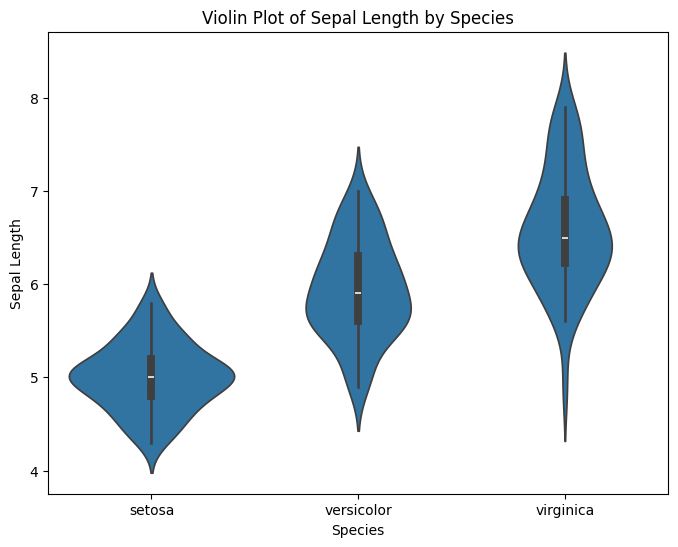

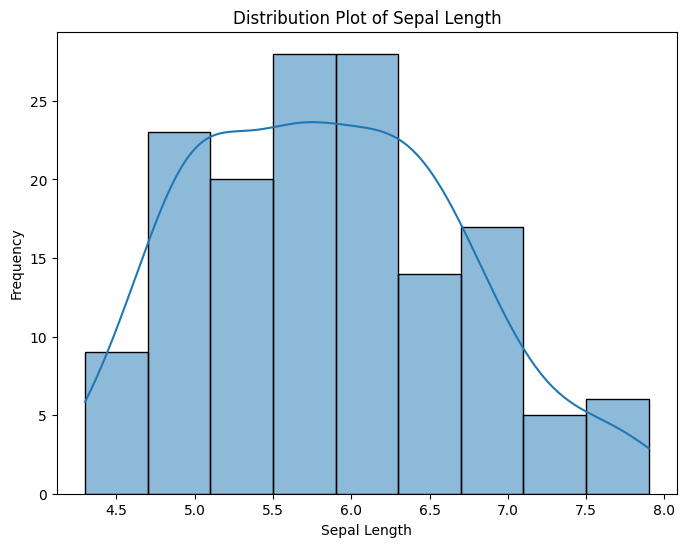

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example dataset
data = sns.load_dataset('iris')

# Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='species', y='sepal_length', data=data)
plt.title('Box Plot of Sepal Length by Species')
plt.xlabel('Species')
plt.ylabel('Sepal Length')
plt.show()

# Violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='species', y='sepal_length', data=data)
plt.title('Violin Plot of Sepal Length by Species')
plt.xlabel('Species')
plt.ylabel('Sepal Length')
plt.show()

# Distribution plot
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='sepal_length', kde=True)
plt.title('Distribution Plot of Sepal Length')
plt.xlabel('Sepal Length')
plt.ylabel('Frequency')
plt.show()
